In [1]:
#import dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
# Import API key
from api_keys import g_key
import numpy as np

In [2]:
#read in all zipcode csvs
Csvpath1 = "30312_weather_traffic_FINAL.csv"
Csvpath2 = "30339_weather_traffic_FINAL.csv"
Csvpath3 = "30331_weather_traffic_FINAL.csv"
Csvpath4 = "30315_weather_traffic_FINAL.csv"
Csvpath5 = "30309_weather_traffic_FINAL.csv"
Csvpath6 = "30340_weather_traffic_FINAL.csv"
Csvpath7 = "30308_weather_traffic_FINAL.csv"
Csvpath8 = "30324_weather_traffic_FINAL.csv"
Csvpath9 = "30342_weather_traffic_FINAL.csv"
Csvpath10 ="30318_weather_traffic_FINAL.csv"

zip_30312_df = pd.read_csv(Csvpath1)
zip_30339_df = pd.read_csv(Csvpath2)
zip_30331_df = pd.read_csv(Csvpath3)
zip_30315_df = pd.read_csv(Csvpath4)
zip_30309_df = pd.read_csv(Csvpath5)
zip_30340_df = pd.read_csv(Csvpath6)
zip_30308_df = pd.read_csv(Csvpath7)
zip_30324_df = pd.read_csv(Csvpath8)
zip_30342_df = pd.read_csv(Csvpath9)
zip_30318_df = pd.read_csv(Csvpath10)

In [3]:
zip_30312_df.columns

Index(['Unnamed: 0', 'Location', 'Address', 'Country', 'Date',
       'Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Heat Index', 'Precipitation', 'Snow Depth', 'Wind Speed',
       'Wind Gust', 'Cloud Cover', 'Relative Humidity', 'Conditions',
       'Severity_1', 'Severity_2', 'Severity_3', 'Severity_4',
       'Residential_ct', 'Interstate_ct', 'Accident_ct', 'Zipcode'],
      dtype='object')

In [4]:
zip_30312_df = zip_30312_df[['Address', 'Date',
       'Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Precipitation', 'Snow Depth', 'Wind Speed', 'Cloud Cover', 'Relative Humidity', 'Conditions',
       'Severity_1', 'Severity_2', 'Severity_3', 'Severity_4',
       'Residential_ct', 'Interstate_ct', 'Accident_ct', 'Zipcode']]
zip_30312_df["Relative Humidity"].min()

34.57

In [5]:
zip_30312_df_low_wind = zip_30312_df.loc[zip_30312_df["Wind Speed"]<8,:]
zip_30312_df_med_wind = zip_30312_df.loc[(zip_30312_df["Wind Speed"]>=8)
                                         &(zip_30312_df["Wind Speed"]<16),:]
zip_30312_df_high_wind = zip_30312_df.loc[zip_30312_df["Wind Speed"]>=16,:]
zip_30312_df_high_wind

,Address,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow Depth,Wind Speed,Cloud Cover,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
3,30312,01/04/2019,64.8,45.1,54.5,40.1,1.2,NaN,18.9,87.3,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
4,30312,01/05/2019,57.8,43.7,48.8,36.4,0.0,NaN,17.1,40.2,64.92,Partially cloudy,0,0,2,0,1,1,2,30312
8,30312,01/09/2019,56.1,39.3,46.7,30.3,0.0,NaN,20.4,3.2,41.08,Clear,0,2,2,0,1,3,4,30312
9,30312,01/10/2019,44.6,29.1,36.2,19.2,0.0,NaN,16.5,15.9,50.48,Clear,0,3,1,0,3,1,4,30312
19,30312,01/20/2019,52.7,28.7,35.6,17.9,0.0,NaN,22.4,64.0,67.57,Partially cloudy,0,2,2,0,1,3,4,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,30312,11/26/2018,53.0,35.9,45.1,29.4,0.0,NaN,20.7,81.9,74.42,Overcast,0,3,0,1,1,3,4,30312
695,30312,11/27/2018,42.8,30.8,35.6,22.2,0.0,NaN,19.1,18.4,56.47,Clear,0,2,1,0,1,2,3,30312
706,30312,12/08/2018,44.9,38.9,41.1,29.8,1.6,NaN,18.1,100.0,92.67,"Rain, Overcast",0,0,3,0,2,1,3,30312
707,30312,12/09/2018,38.6,35.3,37.0,26.3,1.0,NaN,17.0,100.0,90.76,"Rain, Overcast",0,0,7,0,3,4,7,30312


In [6]:
zip_30312_df_low_wind["Wind Speed"]

0      6.1
1      7.3
5      7.6
10     7.7
16     5.1
      ... 
704    7.3
705    6.9
710    7.0
723    5.7
728    4.9
Name: Wind Speed, Length: 133, dtype: float64

<BarContainer object of 3 artists>

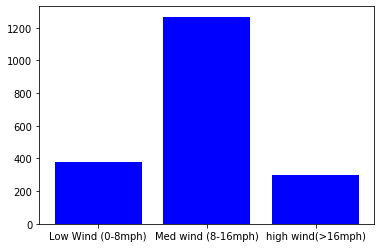

In [7]:
names = ["Low Wind (0-8mph)", "Med wind (8-16mph)", "high wind(>16mph)"]
data = [zip_30312_df_low_wind["Accident_ct"].sum(),zip_30312_df_med_wind["Accident_ct"].sum(),zip_30312_df_high_wind["Accident_ct"].sum()]
plt.bar(names, data, color="b", align="center")

In [8]:
# column_names = ['low', 'med', 'high']
# bars1 = [zip_30312_df_low_wind["Severity_1"].sum(),zip_30312_df_med_wind["Severity_1"].sum(),
#          zip_30312_df_high_wind["Severity_1"].sum()]
# bars2 = [zip_30312_df_low_wind["Severity_2"].sum(),zip_30312_df_med_wind["Severity_2"].sum(),
#          zip_30312_df_high_wind["Severity_2"].sum()]
# bars3 = [zip_30312_df_low_wind["Severity_3"].sum(),zip_30312_df_med_wind["Severity_3"].sum(),
#          zip_30312_df_high_wind["Severity_3"].sum()]
# bars4 = [zip_30312_df_low_wind["Severity_4"].sum(),zip_30312_df_med_wind["Severity_4"].sum(),
#          zip_30312_df_high_wind["Severity_4"].sum()]
# df = pd.DataFrame([bars1, bars2, bars3,bars4], columns = column_names)
# df.plot.bar(stacked=True)

In [9]:
# column_names = ['Severity1', 'Sev2', 'Sev3', 'Sev4']
# bars1 = [zip_30312_df_low_wind["Severity_1"].sum(),zip_30312_df_med_wind["Severity_1"].sum(),
#          zip_30312_df_high_wind["Severity_1"].sum()]
# bars2 = [zip_30312_df_low_wind["Severity_2"].sum(),zip_30312_df_med_wind["Severity_2"].sum(),
#          zip_30312_df_high_wind["Severity_2"].sum()]
# bars3 = [zip_30312_df_low_wind["Severity_3"].sum(),zip_30312_df_med_wind["Severity_3"].sum(),
#          zip_30312_df_high_wind["Severity_3"].sum()]
# bars4 = [zip_30312_df_low_wind["Severity_4"].sum(),zip_30312_df_med_wind["Severity_4"].sum(),
#          zip_30312_df_high_wind["Severity_4"].sum()]

# df = pd.DataFrame([bars1, bars2, bars3, bars4], columns = column_names)
# df.plot.bar(stacked=True)

Text(0.5, 1.0, 'Wind Speed vs Severity')

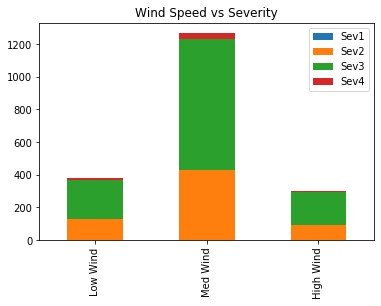

In [10]:
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib
column_names = ['Sev1', 'Sev2', 'Sev3', 'Sev4']
bars1 = [zip_30312_df_low_wind["Severity_1"].sum(),zip_30312_df_low_wind["Severity_2"].sum(),
         zip_30312_df_low_wind["Severity_3"].sum(),zip_30312_df_low_wind["Severity_4"].sum() ]
bars2 = [zip_30312_df_med_wind["Severity_1"].sum(),zip_30312_df_med_wind["Severity_2"].sum(),
         zip_30312_df_med_wind["Severity_3"].sum(),zip_30312_df_med_wind["Severity_4"].sum() ]
bars3 = [zip_30312_df_high_wind["Severity_1"].sum(),zip_30312_df_high_wind["Severity_2"].sum(),
         zip_30312_df_high_wind["Severity_3"].sum(),zip_30312_df_high_wind["Severity_4"].sum() ]

df = pd.DataFrame([bars1, bars2, bars3], columns = column_names)
df.plot.bar(stacked=True)
plt.xticks([0, 1, 2], ['Low Wind', 'Med Wind', 'High Wind'])
plt.title("Wind Speed vs Severity")

In [11]:
zip_30312_df_low_hum = zip_30312_df.loc[zip_30312_df["Relative Humidity"]<50,:]
zip_30312_df_med_hum = zip_30312_df.loc[(zip_30312_df["Relative Humidity"]>=50)
                                         &(zip_30312_df["Relative Humidity"]<80),:]
zip_30312_df_high_hum = zip_30312_df.loc[zip_30312_df["Relative Humidity"]>=80,:]
zip_30312_df_high_hum

,Address,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow Depth,Wind Speed,Cloud Cover,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
0,30312,01/01/2019,65.1,56.4,61.5,NaN,0.2,NaN,6.1,74.1,90.30,"Rain, Partially cloudy",0,0,2,0,1,1,2,30312
1,30312,01/02/2019,57.0,49.0,52.4,46.3,0.4,NaN,7.3,75.9,91.80,"Rain, Overcast",0,0,1,0,0,1,1,30312
2,30312,01/03/2019,54.3,50.1,52.5,NaN,0.3,NaN,10.6,99.5,95.95,"Rain, Overcast",0,2,2,0,1,3,4,30312
3,30312,01/04/2019,64.8,45.1,54.5,40.1,1.2,NaN,18.9,87.3,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
12,30312,01/13/2019,45.9,35.1,40.1,28.0,0.2,NaN,9.9,99.7,91.84,"Rain, Overcast",0,0,1,0,0,1,1,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,30312,12/23/2018,59.6,31.4,45.3,40.4,0.0,NaN,15.5,40.5,83.32,Partially cloudy,0,0,1,0,0,1,1,30312
726,30312,12/28/2018,62.0,49.7,55.5,45.3,3.4,NaN,12.1,83.9,96.22,"Rain, Overcast",0,2,4,0,2,4,6,30312
727,30312,12/29/2018,59.6,46.1,52.2,44.5,0.0,NaN,8.8,46.5,82.07,Partially cloudy,0,0,2,0,0,2,2,30312
728,30312,12/30/2018,54.4,50.0,52.0,48.3,0.4,NaN,4.9,98.8,94.93,"Rain, Overcast",0,0,2,0,0,2,2,30312


Text(0.5, 1.0, 'Relative Humidity vs Severity')

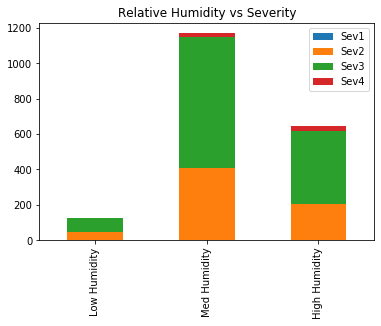

In [12]:
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib
column_names = ['Sev1', 'Sev2', 'Sev3', 'Sev4']
bars4 = [zip_30312_df_low_hum["Severity_1"].sum(),zip_30312_df_low_hum["Severity_2"].sum(),
         zip_30312_df_low_hum["Severity_3"].sum(),zip_30312_df_low_hum["Severity_4"].sum() ]
bars5 = [zip_30312_df_med_hum["Severity_1"].sum(),zip_30312_df_med_hum["Severity_2"].sum(),
         zip_30312_df_med_hum["Severity_3"].sum(),zip_30312_df_med_hum["Severity_4"].sum() ]
bars6 = [zip_30312_df_high_hum["Severity_1"].sum(),zip_30312_df_high_hum["Severity_2"].sum(),
         zip_30312_df_high_hum["Severity_3"].sum(),zip_30312_df_high_hum["Severity_4"].sum() ]

df = pd.DataFrame([bars4, bars5, bars6], columns = column_names)
df.plot.bar(stacked=True)
plt.xticks([0, 1, 2], ['Low Humidity', 'Med Humidity', 'High Humidity'])
plt.title("Relative Humidity vs Severity")

In [13]:
zip_30312_df_low_temp = zip_30312_df.loc[zip_30312_df["Maximum Temperature"]<50,:]
zip_30312_df_med_temp= zip_30312_df.loc[(zip_30312_df["Maximum Temperature"]>=50)
                                         &(zip_30312_df["Maximum Temperature"]<80),:]
zip_30312_df_high_temp = zip_30312_df.loc[zip_30312_df["Maximum Temperature"]>=80,:]
zip_30312_df_high_temp


,Address,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow Depth,Wind Speed,Cloud Cover,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
99,30312,04/10/2019,81.5,55.7,68.2,NaN,0.0,NaN,5.6,11.8,66.67,Clear,0,3,0,0,2,1,3,30312
100,30312,04/11/2019,81.1,59.3,70.5,NaN,0.0,NaN,15.6,32.9,62.80,Partially cloudy,0,1,0,0,0,1,1,30312
102,30312,04/13/2019,81.3,60.9,70.2,NaN,0.0,NaN,11.0,43.4,70.22,Partially cloudy,0,0,4,1,0,5,5,30312
106,30312,04/17/2019,80.1,50.5,65.5,NaN,0.0,NaN,9.1,31.6,59.43,Partially cloudy,0,0,0,0,0,0,0,30312
111,30312,04/22/2019,80.4,45.9,63.0,47.7,0.0,NaN,8.3,5.7,55.16,Clear,0,0,2,0,1,1,2,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,30312,10/08/2018,83.6,71.2,77.1,NaN,0.0,NaN,11.6,58.3,73.12,Partially cloudy,0,0,1,0,0,1,1,30312
646,30312,10/09/2018,80.0,70.7,74.4,NaN,0.1,NaN,15.2,91.0,82.39,"Rain, Overcast",0,2,3,0,1,4,5,30312
647,30312,10/10/2018,81.7,71.6,75.1,NaN,2.5,NaN,16.9,94.4,90.25,"Rain, Overcast",0,1,2,0,0,3,3,30312
652,30312,10/15/2018,80.6,61.6,69.4,NaN,0.0,NaN,6.7,52.1,85.05,Partially cloudy,0,1,3,0,1,3,4,30312


Text(0.5, 1.0, 'Maximum Temperature vs Severity')

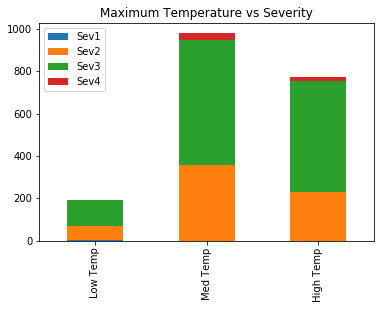

In [14]:
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib
column_names = ['Sev1', 'Sev2', 'Sev3', 'Sev4']
bars7 = [zip_30312_df_low_temp["Severity_1"].sum(),zip_30312_df_low_temp["Severity_2"].sum(),
         zip_30312_df_low_temp["Severity_3"].sum(),zip_30312_df_low_temp["Severity_4"].sum() ]
bars8 = [zip_30312_df_med_temp["Severity_1"].sum(),zip_30312_df_med_temp["Severity_2"].sum(),
         zip_30312_df_med_temp["Severity_3"].sum(),zip_30312_df_med_temp["Severity_4"].sum() ]
bars9 = [zip_30312_df_high_temp["Severity_1"].sum(),zip_30312_df_high_temp["Severity_2"].sum(),
         zip_30312_df_high_temp["Severity_3"].sum(),zip_30312_df_high_temp["Severity_4"].sum() ]

df = pd.DataFrame([bars7, bars8, bars9], columns = column_names)
df.plot.bar(stacked=True)
plt.xticks([0, 1, 2], ['Low Temp', 'Med Temp', 'High Temp'])
plt.title("Maximum Temperature vs Severity")

Text(0.5, 1.0, 'Maximum Temperature vs Severity - Averages')

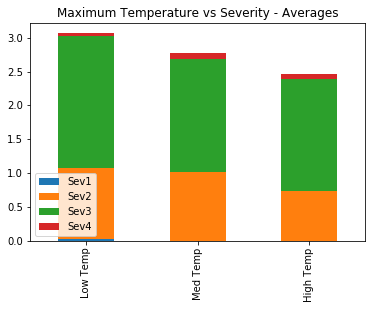

In [15]:
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib
column_names = ['Sev1', 'Sev2', 'Sev3', 'Sev4']
bars7 = [zip_30312_df_low_temp["Severity_1"].mean(),zip_30312_df_low_temp["Severity_2"].mean(),
         zip_30312_df_low_temp["Severity_3"].mean(),zip_30312_df_low_temp["Severity_4"].mean() ]
bars8 = [zip_30312_df_med_temp["Severity_1"].mean(),zip_30312_df_med_temp["Severity_2"].mean(),
         zip_30312_df_med_temp["Severity_3"].mean(),zip_30312_df_med_temp["Severity_4"].mean() ]
bars9 = [zip_30312_df_high_temp["Severity_1"].mean(),zip_30312_df_high_temp["Severity_2"].mean(),
         zip_30312_df_high_temp["Severity_3"].mean(),zip_30312_df_high_temp["Severity_4"].mean() ]

df = pd.DataFrame([bars7, bars8, bars9], columns = column_names)
df.plot.bar(stacked=True)
plt.xticks([0, 1, 2], ['Low Temp', 'Med Temp', 'High Temp'])
plt.title("Maximum Temperature vs Severity - Averages")

Text(0, 0.5, 'Sum of accidents')

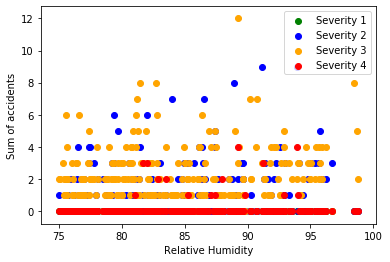

In [16]:
zip_30312_df_reduced_hum = zip_30312_df.loc[zip_30312_df["Relative Humidity"]>75,:]
x_hum = zip_30312_df_reduced_hum["Relative Humidity"]
y1_hum = zip_30312_df_reduced_hum["Severity_1"]
y2_hum = zip_30312_df_reduced_hum["Severity_2"]
y3_hum = zip_30312_df_reduced_hum["Severity_3"]
y4_hum = zip_30312_df_reduced_hum["Severity_4"]
plt.scatter(x_hum,y1_hum,color='green', label = "Severity 1")
plt.scatter(x_hum,y2_hum,color='blue',label = "Severity 2")
plt.scatter(x_hum,y3_hum,color='orange',label = "Severity 3")
plt.scatter(x_hum,y4_hum,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Relative Humidity")
plt.ylabel("Sum of accidents")

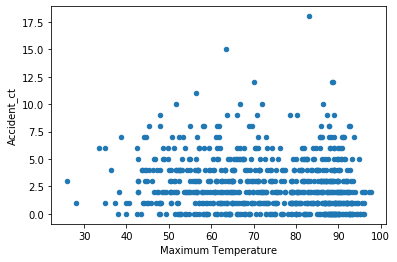

In [17]:
zip_30312_df.plot.scatter('Maximum Temperature', 'Accident_ct')

Text(0, 0.5, 'Sum of accidents')

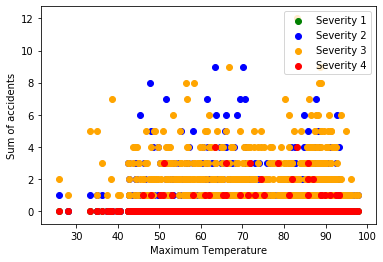

In [18]:

x_temp = zip_30312_df["Maximum Temperature"]
y1_temp = zip_30312_df["Severity_1"]
y2_temp = zip_30312_df["Severity_2"]
y3_temp = zip_30312_df["Severity_3"]
y4_temp = zip_30312_df["Severity_4"]
plt.scatter(x_temp,y1_temp,color='green', label = "Severity 1")
plt.scatter(x_temp,y2_temp,color='blue',label = "Severity 2")
plt.scatter(x_temp,y3_temp,color='orange',label = "Severity 3")
plt.scatter(x_temp,y4_temp,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Maximum Temperature")
plt.ylabel("Sum of accidents")

Text(0.5, 1.0, 'Extreme temp vs sum of accidents')

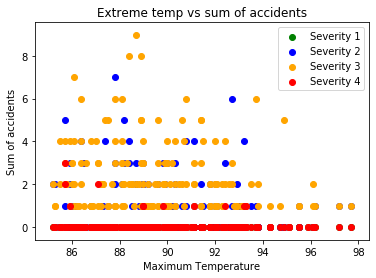

In [19]:
extreme_temp = zip_30312_df.loc[zip_30312_df["Maximum Temperature"]>85,:]
x_temp_ex = extreme_temp["Maximum Temperature"]
y1_temp_ex = extreme_temp["Severity_1"]
y2_temp_ex = extreme_temp["Severity_2"]
y3_temp_ex = extreme_temp["Severity_3"]
y4_temp_ex = extreme_temp["Severity_4"]
plt.scatter(x_temp_ex,y1_temp_ex,color='green', label = "Severity 1")
plt.scatter(x_temp_ex,y2_temp_ex,color='blue',label = "Severity 2")
plt.scatter(x_temp_ex,y3_temp_ex,color='orange',label = "Severity 3")
plt.scatter(x_temp_ex,y4_temp_ex,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Maximum Temperature")
plt.ylabel("Sum of accidents")
plt.title("Extreme temp vs sum of accidents")

In [20]:
zip_30312_df["Conditions"].unique()

array(['Rain, Partially cloudy', 'Rain, Overcast', 'Partially cloudy',
       'Clear', 'Overcast', 'Rain, Clear', 'Snow, Partially cloudy',
       'Snow, Clear'], dtype=object)

In [21]:
zip_30312_df_Rain_PC = zip_30312_df.loc[zip_30312_df["Conditions"]=="Rain, Partially cloudy",:]
zip_30312_df_Rain_OC = zip_30312_df.loc[zip_30312_df["Conditions"]=="Rain, Overcast",:]
zip_30312_df_PC = zip_30312_df.loc[zip_30312_df["Conditions"]=="Partially cloudy",:]
zip_30312_df_Clear = zip_30312_df.loc[zip_30312_df["Conditions"]=="Clear",:]
zip_30312_df_OC = zip_30312_df.loc[zip_30312_df["Conditions"]=="Overcast",:]
zip_30312_df_Rain_Clear = zip_30312_df.loc[zip_30312_df["Conditions"]=="Rain, Clear",:]
zip_30312_df_Snow_PC = zip_30312_df.loc[zip_30312_df["Conditions"]=="Snow, Partially cloudy",:]
zip_30312_df_Snow_Clear = zip_30312_df.loc[zip_30312_df["Conditions"]=="Snow, Clear",:]

Text(0.5, 1.0, 'Conditions vs Severity')

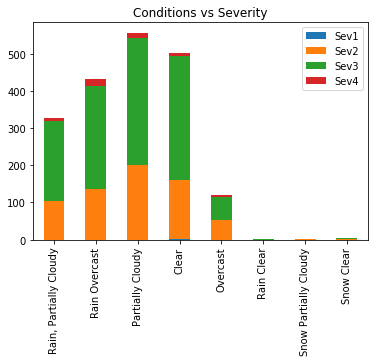

In [22]:
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib
column_names = ['Sev1', 'Sev2', 'Sev3', 'Sev4']
bars10 = [zip_30312_df_Rain_PC["Severity_1"].sum(),zip_30312_df_Rain_PC["Severity_2"].sum(),
         zip_30312_df_Rain_PC["Severity_3"].sum(),zip_30312_df_Rain_PC["Severity_4"].sum() ]
bars11 = [zip_30312_df_Rain_OC["Severity_1"].sum(),zip_30312_df_Rain_OC["Severity_2"].sum(),
         zip_30312_df_Rain_OC["Severity_3"].sum(),zip_30312_df_Rain_OC["Severity_4"].sum() ]
bars12 = [zip_30312_df_PC["Severity_1"].sum(),zip_30312_df_PC["Severity_2"].sum(),
         zip_30312_df_PC["Severity_3"].sum(),zip_30312_df_PC["Severity_4"].sum() ]
bars13 = [zip_30312_df_Clear["Severity_1"].sum(),zip_30312_df_Clear["Severity_2"].sum(),
         zip_30312_df_Clear["Severity_3"].sum(),zip_30312_df_Clear["Severity_4"].sum() ]
bars14 = [zip_30312_df_OC["Severity_1"].sum(),zip_30312_df_OC["Severity_2"].sum(),
         zip_30312_df_OC["Severity_3"].sum(),zip_30312_df_OC["Severity_4"].sum() ]
bars15 = [zip_30312_df_Rain_Clear["Severity_1"].sum(),zip_30312_df_Rain_Clear["Severity_2"].sum(),
         zip_30312_df_Rain_Clear["Severity_3"].sum(),zip_30312_df_Rain_Clear["Severity_4"].sum() ]
bars16 = [zip_30312_df_Snow_PC["Severity_1"].sum(),zip_30312_df_Snow_PC["Severity_2"].sum(),
         zip_30312_df_Snow_PC["Severity_3"].sum(),zip_30312_df_Snow_PC["Severity_4"].sum() ]
bars17 = [zip_30312_df_Snow_Clear["Severity_1"].sum(),zip_30312_df_Snow_Clear["Severity_2"].sum(),
         zip_30312_df_Snow_Clear["Severity_3"].sum(),zip_30312_df_Snow_Clear["Severity_4"].sum() ]

df = pd.DataFrame([bars10, bars11, bars12, bars13, bars14, bars15, bars16, bars17], columns = column_names)
df.plot.bar(stacked=True)
plt.xticks([0, 1, 2,3,4,5,6,7], ['Rain, Partially Cloudy', 'Rain Overcast', 'Partially Cloudy', 'Clear','Overcast', 'Rain Clear', 'Snow Partially Cloudy', 'Snow Clear'])
plt.title("Conditions vs Severity")

Text(0.5, 1.0, 'Conditions vs Severity - AVERAGES')

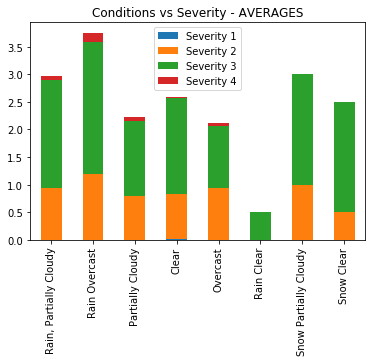

In [24]:
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib
column_names = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
bars10 = [zip_30312_df_Rain_PC["Severity_1"].mean(),zip_30312_df_Rain_PC["Severity_2"].mean(),
         zip_30312_df_Rain_PC["Severity_3"].mean(),zip_30312_df_Rain_PC["Severity_4"].mean() ]
bars11 = [zip_30312_df_Rain_OC["Severity_1"].mean(),zip_30312_df_Rain_OC["Severity_2"].mean(),
         zip_30312_df_Rain_OC["Severity_3"].mean(),zip_30312_df_Rain_OC["Severity_4"].mean() ]
bars12 = [zip_30312_df_PC["Severity_1"].mean(),zip_30312_df_PC["Severity_2"].mean(),
         zip_30312_df_PC["Severity_3"].mean(),zip_30312_df_PC["Severity_4"].mean() ]
bars13 = [zip_30312_df_Clear["Severity_1"].mean(),zip_30312_df_Clear["Severity_2"].mean(),
         zip_30312_df_Clear["Severity_3"].mean(),zip_30312_df_Clear["Severity_4"].mean() ]
bars14 = [zip_30312_df_OC["Severity_1"].mean(),zip_30312_df_OC["Severity_2"].mean(),
         zip_30312_df_OC["Severity_3"].mean(),zip_30312_df_OC["Severity_4"].mean() ]
bars15 = [zip_30312_df_Rain_Clear["Severity_1"].mean(),zip_30312_df_Rain_Clear["Severity_2"].mean(),
         zip_30312_df_Rain_Clear["Severity_3"].mean(),zip_30312_df_Rain_Clear["Severity_4"].mean() ]
bars16 = [zip_30312_df_Snow_PC["Severity_1"].mean(),zip_30312_df_Snow_PC["Severity_2"].mean(),
         zip_30312_df_Snow_PC["Severity_3"].mean(),zip_30312_df_Snow_PC["Severity_4"].mean() ]
bars17 = [zip_30312_df_Snow_Clear["Severity_1"].mean(),zip_30312_df_Snow_Clear["Severity_2"].mean(),
         zip_30312_df_Snow_Clear["Severity_3"].mean(),zip_30312_df_Snow_Clear["Severity_4"].mean() ]

df = pd.DataFrame([bars10, bars11, bars12, bars13, bars14, bars15, bars16, bars17], columns = column_names)
df.plot.bar(stacked=True)
plt.xticks([0, 1, 2,3,4,5,6,7], ['Rain, Partially Cloudy', 'Rain Overcast', 'Partially Cloudy', 'Clear','Overcast', 'Rain Clear', 'Snow Partially Cloudy', 'Snow Clear'])
plt.title("Conditions vs Severity - AVERAGES")